# K-Means Clustering

Bu challenge, **K-means** kümelemenin nasıl çalıştığına dair sezgisel bir anlayış kazanmanıza yardımcı olacaktır.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

## 1) Veri Oluşturma

Verilerimizin gerçekten ilgili kümeleri içerdiğinden emin olmak için, bunları kendimiz oluşturacağız.

Bunu yapmak için, `sklearn`'den [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) kullanacağız.  

**500 gözlem**, **2 özellik** ve **4 küme** içeren bir veri kümesi istiyoruz.  

Sonuçları arkadaşınızla karşılaştırabilmeniz için *random_state=42* kullanıyoruz.

👇 Verilerinizi oluşturmak için aşağıdaki hücreyi çalıştırın.

In [2]:
random_state=42

# Veri oluştur
X, y = make_blobs(n_samples=500, centers=4, random_state=random_state)

❓ İki özelliğinizi birbirine göre dağılım grafiği oluşturun  
❓ Noktaları, `y`'deki karşılık gelen değerlerine göre renklendirin

<details span="markdown">
    <summary>💡 Yardım</summary>

- Renk argümanını hatırlayın:
 - matplotlib için `c`  
 - seaborn için `hue` 

---
</details>

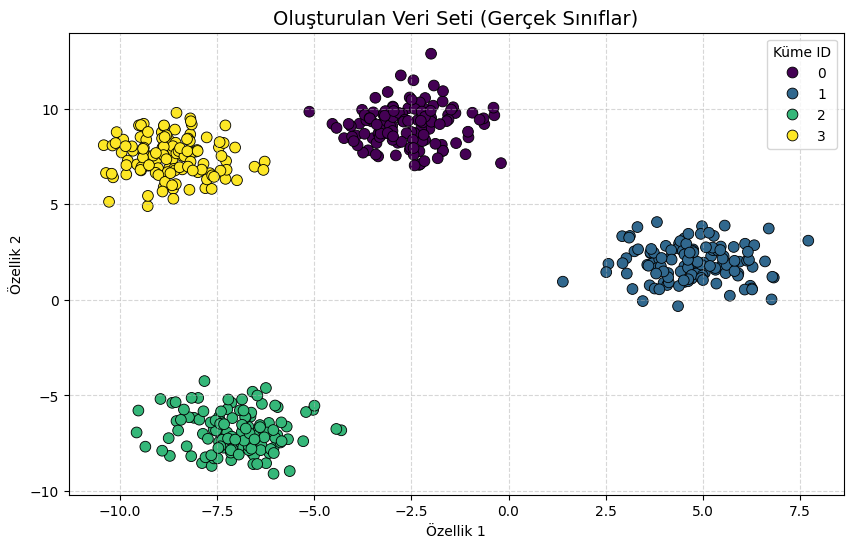

In [3]:
plt.figure(figsize=(10, 6))

# X[:, 0] -> 1. Özellik (x ekseni)
# X[:, 1] -> 2. Özellik (y ekseni)
# c=y     -> Noktaları gerçek sınıflarına (y) göre renklendir
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=60, edgecolor='black')

plt.title("Oluşturulan Veri Seti (Gerçek Sınıflar)", fontsize=14)
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.legend(title='Küme ID')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

👆 Her biri farklı renkte olan 4 ayrı küme görmelisiniz.  

`X` üzerinde `y` hedefli bir KNN Sınıflandırıcı eğitimi harika sonuçlar verecektir.

Ancak bugün **Unsupervised Learning** hakkında konuşacağız.  

`y` hakkında hiçbir şey bilmediğimizi ve sadece `X` ile çalışmak için aldığımızı varsayalım.  

Sadece 2 özelliğimiz var ve hedefimiz yok 😱  

**Sadece `X` ile ne yapabiliriz?**  🤔

## 2) K-Means uygulayın

Amacınız, verilerinizin yapısına en uygun **küme sayısını** bulmaktır.


👉`sklearn`'den `KMeans`'i içe aktarın ve aşağıdaki parametrelerle bir model başlatın:
- `n_clusters=2`,
- `random_state=42`

❓Modeli `X`'inize uyarlayın  
❓ Tahminlerinizi alın ve bunları `y_pred` değişkeninde saklayın.  

In [4]:
from sklearn.cluster import KMeans

# 1. Modeli n_clusters=2 ve random_state=42 ile başlatın
kmeans = KMeans(n_clusters=2, random_state=42)

# 2. Modeli X verisine uyarlayın (fit)
kmeans.fit(X)

# 3. Tahminleri (etiketleri) alıp y_pred değişkenine atayın
y_pred = kmeans.predict(X)

# Kontrol etmek için ilk 5 tahmini yazdıralım
print(y_pred[:5])

[0 1 0 0 1]


👆 Tahminler, her bir gözlem için küme atamasının vektörüdür.  
`n_clusters=2` ile `X` içindeki her bir gözlem, iki kümeden birine atanacaktır.

❓ İki özelliğinizi birbirine göre dağılım grafiği oluşturun
❓ Noktaları `y_pred` içinde tahmin edilen kümeye göre renklendirin

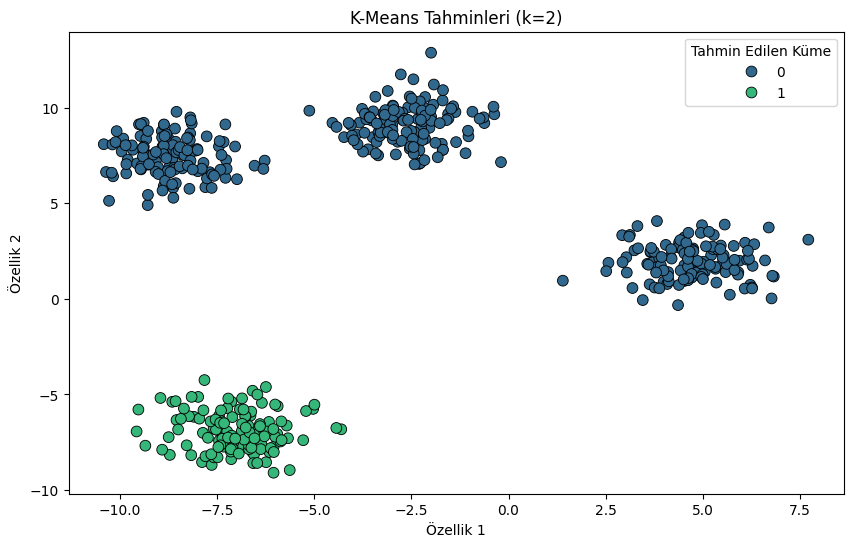

In [5]:
plt.figure(figsize=(10, 6))

# X[:, 0] ve X[:, 1] özelliklerini kullanıyoruz
# hue=y_pred diyerek renklendirmeyi modelin tahminlerine göre yapıyoruz
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='viridis', s=60, edgecolor='black')

plt.title("K-Means Tahminleri (k=2)")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.legend(title='Tahmin Edilen Küme')
plt.show()

👆 Hala 4 farklı küme görebilirsiniz, ancak renkler sadece 2'sini gösteriyor. 😱

Bu, **Kmeans**'e `n_clusters=2` verdiğimizde tam olarak istediğimiz şeydi.

Algoritmamızdan her bir gözlemi iki merkezden birine, dolayısıyla sadece iki kümeden birine atamasını istedik.

**2 merkez etrafında yapılan bu kümeleme açıkça optimal değildir, daha iyisini yapabiliriz** 💪

### 🧪 Kodunu Test Et

In [6]:
from nbresult import ChallengeResult

result = ChallengeResult('two_means', clusters=y_pred)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/egkpnr/.pyenv/versions/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /home/egkpnr/code/EGkpnr/S17D3-S-/S17D3-S-data-image-compressor/tests
plugins: anyio-4.8.0, dash-3.3.0, typeguard-4.4.2, langsmith-0.6.0
collecting ... collected 2 items

test_two_means.py::TestTwoMeans::test_imbalanced_clusters PASSED         [ 50%]
test_two_means.py::TestTwoMeans::test_two_clusters PASSED                [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/two_means.pickle

git commit -m 'Completed two_means step'

git push origin master



## 3) Optimum küme sayısını bulun   
*Elbow Method*

Uygun hale getirildikten sonra, `KMeans` örneği `inertia_` adlı bir öznitelik kazanır.

Bu öznitelik, **gözlemlerin ilişkili (en yakın) küme merkezine olan mesafelerinin karelerinin toplamını** temsil eder. 

Dolayısıyla, değer ne kadar düşükse o kadar iyidir.  

In [7]:
KMeans(n_clusters=2, random_state=random_state).fit(X).inertia_

15737.083577865

👆 Bunu, doğrusal regresyondaki kareler toplamı hatası ile karşılaştırarak düşünün 👇

- `Doğrusal regresyonun` `SSE` değeri 👉 `Gözlemler ile regresyon çizgisi arasındaki mesafelerin karelerinin toplamı`

- `KMeans kümelemenin` `Inertia` değeri 👉 `Gözlemler ile en yakın merkez noktaları arasındaki mesafelerin karelerinin toplamı`

Optimum küme sayısını bulmanın bir yolu, **Elbow Yöntemi** adlı sezgisel bir yöntemdir.  

Birkaç küme sayısını denemeli ve her biri için elde edilen ataleti incelemeliyiz.  

Bunu yaparak sezgisel bir fikir edinebiliriz! ⚙️🧠

❓ 1 ile 10 arasındaki her küme sayısı için bir `KMeans` uydurun, her biri için ataleti bir listeye kaydedin `wcss`

In [8]:
# Optimum küme sayısını bulmak için elbow yöntemini uygulayın.
wcss = []
clusters = list(range(1, 11))

for k in clusters:
    # Her k değeri için yeni bir model kuruyoruz
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Inertia değerini listeye ekliyoruz
    wcss.append(kmeans.inertia_)

# İlk 5 değeri görelim
print(wcss[:5])

[33903.90415102107, 15737.083577865, 3426.257238005966, 948.8903433376544, 861.7648347702069]


❓  `wcss` içindeki ataletleri, karşılık gelen küme sayılarına göre grafik olarak gösterin 

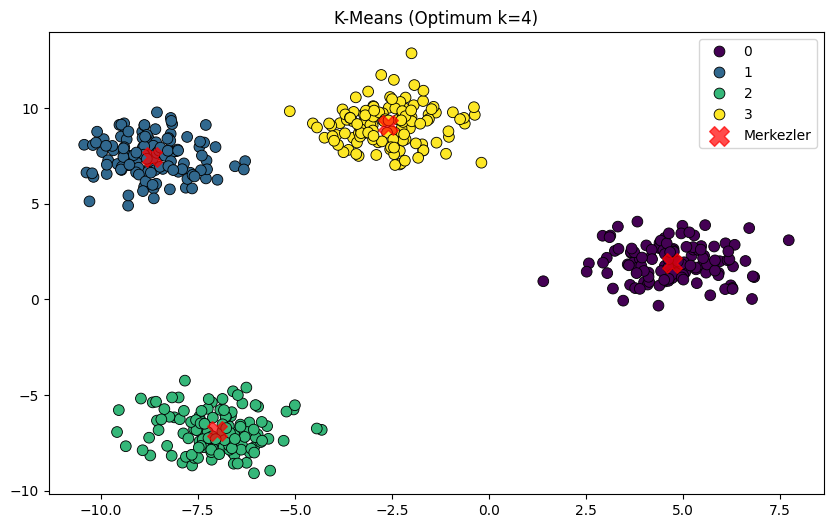

In [9]:
# 1. Modeli optimum küme sayısıyla (k=4) başlatın ve eğitin
kmeans_opt = KMeans(n_clusters=4, random_state=42)
kmeans_opt.fit(X)

# 2. Tahminleri alın
y_pred_opt = kmeans_opt.predict(X)

# 3. Görselleştirme
plt.figure(figsize=(10, 6))
# Bu sefer hue=y_pred_opt kullanıyoruz
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred_opt, palette='viridis', s=60, edgecolor='black')
# Merkezleri de çizelim (Kırmızı X ile)
centers = kmeans_opt.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Merkezler')

plt.title("K-Means (Optimum k=4)")
plt.legend()
plt.show()

👆 4 kümede bir Elbow olduğunu açıkça görüyoruz.  

## 3) Optimal kümelerle K-Means

Optimum küme sayısı bilindiğine göre, son bir `KMeans` uydurma zamanı geldi.

❓ `X` üzerinde `n_clusters=4` ile bir `KMeans` uydurun, tahminleri `y_pred` içinde saklayın  

❓ İki özelliğinizi birbirine göre dağılım grafiği oluşturun ve noktaları `y_pred` içinde tahmin edilen kümeye göre renklendirin

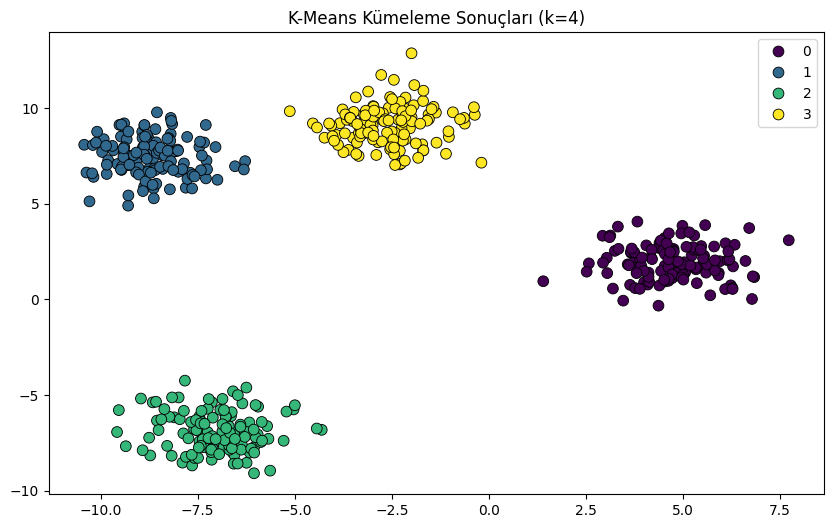

In [10]:
# Modeli optimum küme sayısıyla (k=4) eğitme
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='viridis', s=60, edgecolor='black')
plt.title("K-Means Kümeleme Sonuçları (k=4)")
plt.show()

Bu, kümelemenin en iyi örneğidir 🏆
Gözlemlerimiz arasında **4 küme** başarıyla belirledik.  

**Notlar:** Kümeleme öncesinde ölçeklendirme özellikleri her zaman gerekli değildir, ancak nadiren zarar verir 😇
Daha fazla bilgi için bu [ayrıntılı cevapları](https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering) inceleyebilirsiniz.

🏁 **Not defterini itmeyi unutma.**  

Günün görevlerini yerine getir ve zamanın olursa buraya geri dön 😉

## 4 - Opsiyonel) Hiyerarşik Kümeleme

Optimal küme sayısını bulmamıza yardımcı olacak bir diğer yöntem **[Hiyerarşik Kümeleme (Hierarchical Clustering)](https://en.wikipedia.org/wiki/Hierarchical_clustering)**’dir.

👉 Hiyerarşik kümelemenin **dendrogram**’ını çizin.

Bunun için, SciPy kütüphanesinin  
[`cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) modülünde bulunan iki sınıfa ihtiyacınız olacak:

- [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)  
- [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram)

`linkage` fonksiyonu, **bottom-up (aşağıdan yukarı)** yaklaşımıyla hiyerarşik kümelemeyi gerçekleştirir:  
Her bir gözlem başlangıçta kendi kümesindedir.

Her iterasyonda algoritma, birleştirilecek küme çiftini seçer.  
Son iterasyon, tüm gözlemlerin tek bir kümede toplandığı adımdır.

Burada **Ward yöntemi** kullanılacaktır. Bu yöntem, küme içi toplam varyansı minimize etmeyi amaçlar.  
Yani her adımda algoritma, birleştirildiğinde küme içi varyansı en az artıran iki kümeyi seçer.

**Dendrogram**, ağaç benzeri bir yapıyı temsil eden bir diyagramdır ve bu bağlanma (linkage) sürecini görselleştirmemizi sağlar.

<br>
<details span="markdown">
    <summary>💡 Çözüm </summary>

```python
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='ward')

plt.figure(figsize=(20, 10))
dendrogram(Z, color_threshold=50)
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.xticks([]);
```
---
</details>


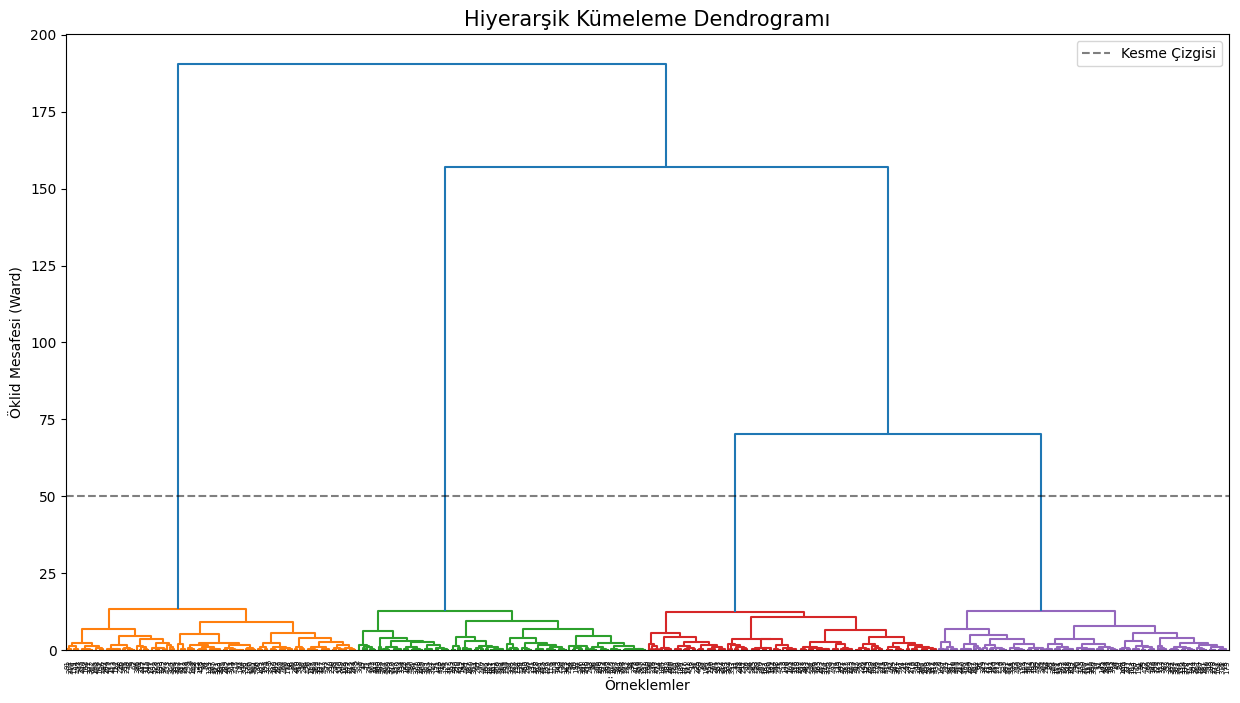

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 1. Linkage Matrisini Oluşturma (Ward Metodu)
# Bu adım, kümeler arasındaki mesafeleri hesaplar ve birleşme sırasını belirler.
Z = linkage(X, method='ward')

# 2. Dendrogramı Çizme
plt.figure(figsize=(15, 8))

# color_threshold=50: Kümeleri renklendirmek için bir eşik değeri.
# Bu değerin altındaki kümeler farklı renklerde gösterilir.
dendrogram(Z, color_threshold=50)

plt.title('Hiyerarşik Kümeleme Dendrogramı', fontsize=15)
plt.ylabel('Öklid Mesafesi (Ward)')
plt.xlabel('Örneklemler')

# Optimum küme sayısını gösteren sanal "kesme" çizgisi
plt.axhline(y=50, c='black', ls='--', alpha=0.5, label='Kesme Çizgisi')
plt.legend()
plt.show()

Hala 4 farklı küme görebiliyoruz  

🤔 Neden burada *Ward yöntemi* kullandık?

💡 Çünkü K-means ile aynı amaç fonksiyonuna sahiptir ve ataleti (yani küme içi varyansı) en aza indirmeye çalışır.

### Hiyerarşik Kümeleme Hakkında Bilgiler

👉 Hiyerarşik kümelemeyi daha iyi anlamak için bu videoyu izleyin: https://www.youtube.com/watch?v=7xHsRkOdVwo

👉 Hiyerarşik kümeleme *açgözlü* olarak kabul edilir, yani yerel bir optimum sonuç verebilir ve büyük resmi gözden kaçırabilir.

👉 Diğer kümeleme bağlantıları (yani iki küme arasındaki mesafeyi ölçmenin diğer yolları) da olduğunu unutmayın. <img src=https://editor.analyticsvidhya.com/uploads/40351linkages.PNG>